# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
#set up empty lists to hold response info
city_name = []
lat = []
temp = []
lon = []
humidity = []
cloudiness = []
wind_speed = []
country = []
index_counter = 0

#loop through cities and request data 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        lon.append(response["coord"]["lon"])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        
        #keep track of records 
        index_counter = index_counter + 1
        
        print(f"Record= {index_counter}: {city}")
        
    except(KeyError,IndexError):
        print('City not found.')
        

        


Record= 1: rikitea
Record= 2: the valley
Record= 3: arraial do cabo
Record= 4: ust-kulom
Record= 5: santa catarina de tepehuanes
Record= 6: albany
Record= 7: sechura
Record= 8: puerto ayora
Record= 9: butaritari
Record= 10: tura
Record= 11: sanand
Record= 12: nanortalik
Record= 13: hobart
Record= 14: qaanaaq
Record= 15: algiers
Record= 16: tasiilaq
Record= 17: bredasdorp
Record= 18: ushuaia
Record= 19: port elizabeth
Record= 20: kashi
Record= 21: busselton
Record= 22: thompson
Record= 23: marzuq
Record= 24: boke
Record= 25: balaipungut
Record= 26: boyolangu
Record= 27: pacific grove
City not found.
Record= 28: castro
Record= 29: binzhou
Record= 30: benguela
Record= 31: esperance
Record= 32: cayenne
Record= 33: mount isa
Record= 34: tocopilla
Record= 35: fortuna
City not found.
Record= 36: yulara
Record= 37: mahebourg
Record= 38: barrow
Record= 39: aizkraukle
Record= 40: ndele
Record= 41: presidencia roque saenz pena
Record= 42: palauig
City not found.
Record= 43: livingstonia
City not 

Record= 344: vindeby
Record= 345: sibolga
Record= 346: luoyang
Record= 347: muyezerskiy
Record= 348: lima
Record= 349: tynda
Record= 350: les cayes
City not found.
Record= 351: wana
Record= 352: hami
Record= 353: nhulunbuy
Record= 354: muscat
City not found.
Record= 355: maneadero
Record= 356: armidale
City not found.
Record= 357: san isidro
Record= 358: lubao
Record= 359: shaowu
Record= 360: airai
Record= 361: vaasa
Record= 362: raga
Record= 363: mehamn
Record= 364: asau
Record= 365: vardo
Record= 366: meulaboh
Record= 367: jadu
Record= 368: la puebla del rio
Record= 369: plouzane
City not found.
Record= 370: saskylakh
Record= 371: sahuaripa
Record= 372: traralgon
Record= 373: nushki
City not found.
Record= 374: westport
Record= 375: bambanglipuro
Record= 376: turukhansk
Record= 377: inta
City not found.
Record= 378: ofaqim
Record= 379: talnakh
City not found.
Record= 380: balgazyn
Record= 381: baykit
Record= 382: copacabana
Record= 383: amahai
Record= 384: lewistown
Record= 385: port

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create pandas dataframe
weather_df=pd.DataFrame({"City": city_name,
                         "Country": country,
                       "Latitude": lat,
                       "Temperature": temp,
                       "Longitude": lon,
                       "Humidity": humidity,
                       "Cloudiness": cloudiness,
                       "Wind Speed": wind_speed})

#convert types to float
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)

weather_df
weather_df.dtypes



City            object
Country         object
Latitude       float64
Temperature    float64
Longitude      float64
Humidity       float64
Cloudiness     float64
Wind Speed     float64
dtype: object

In [6]:
#save city data into csv file 
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

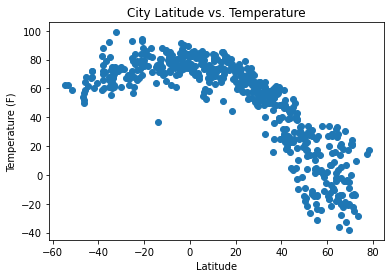

In [7]:
#create latitude vs. Temperature scatter plot
plt.scatter(weather_df["Latitude"],weather_df["Temperature"])

#create title
plt.title("City Latitude vs. Temperature")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#save plot
plt.savefig("../output_data/LatvsTemp.png")
#plot
plt.show()


The lower the latitude the higher the temperature, the higher the latitude the lower the temperature.

## Latitude vs. Humidity Plot

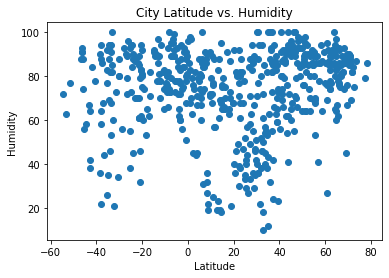

In [8]:
#create latitude vs. Temperature scatter plot
plt.scatter(weather_df["Latitude"],weather_df["Humidity"])

#create title
plt.title("City Latitude vs. Humidity")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#save plot
plt.savefig("../output_data/LatvsHumidity.png")
#plot
plt.show()

Humidity is higher the farther from zero latitude. 

## Latitude vs. Cloudiness Plot

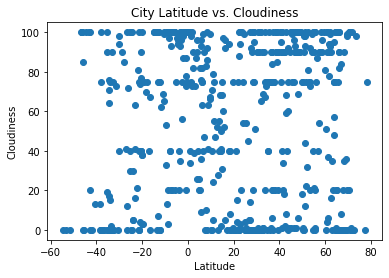

In [10]:
#create latitude vs. Temperature scatter plot
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"])

#create title
plt.title("City Latitude vs. Cloudiness")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#save plot
plt.savefig("../output_data/LatvsCloudiness.png")

#plot
plt.show()

Cloudiness varies across latitudes.

## Latitude vs. Wind Speed Plot

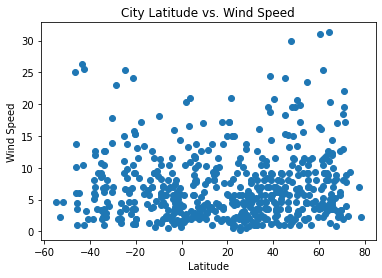

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"])

#create title
plt.title("City Latitude vs. Wind Speed")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#save plot
plt.savefig("../output_data/LatvsWindSpeed.png")

#plot
plt.show()

Windspeed varies across latitudes.

## Linear Regression

In [14]:
#create southern and northern hemisphere dataframes
northern_hem = weather_df.loc[weather_df["Latitude"] >=0]
southern_hem = weather_df.loc[weather_df["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.88
y = -1.4 x + 92.38


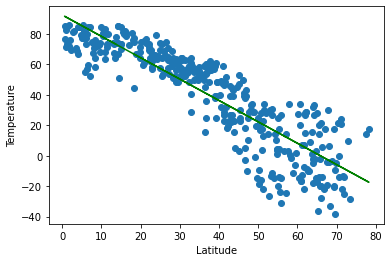

In [31]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Temperature']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save plot
plt.savefig(("../output_data/NorthernHemTempvsLat.png"))

#show plot
plt.show()



Temperature and latitude are negatively correlated in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.5
y = 0.33 x + 81.12


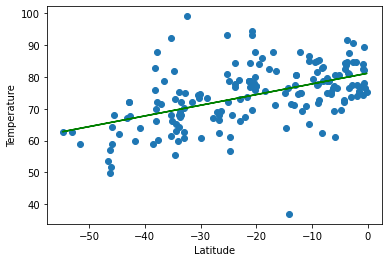

In [30]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Temperature']


#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Temperature")


#save plot
plt.savefig(("../output_data/SouthernHemTempvsLat.png"))

#show plot
plt.show()

Latitude and temperature are slightly positively correlated in the southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31
y = 0.31 x + 60.9


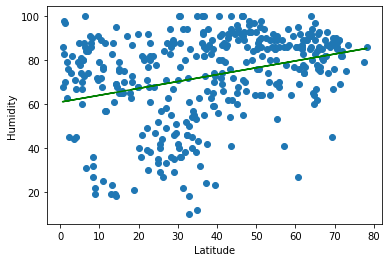

In [32]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Humidity']


#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")


#save plot
plt.savefig(("../output_data/NorthernHemHumidityvsLat.png"))

#show plot
plt.show()

Humidity and latitude are slightly positively correlated in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.22
y = 0.26 x + 81.82


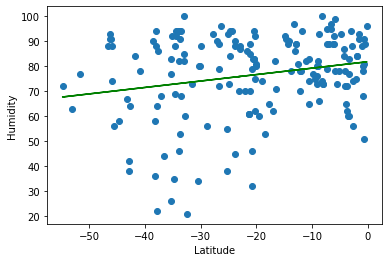

In [33]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Humidity']


#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")


#save plot
plt.savefig(("../output_data/SouthernHemHumidityvsLat.png"))

#show plot
plt.show()

Humidity and latitude have low positive correlation in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.05
y = 0.09 x + 50.7


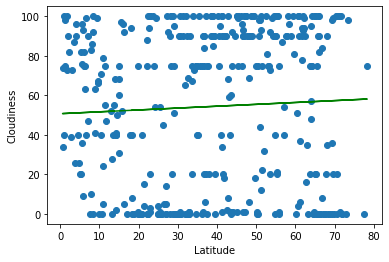

In [26]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Cloudiness']


#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


#save plot
plt.savefig(("../output_data/NorthernHemCloudinessyvsLat.png"))

#show plot
plt.show()

Humidity and latitude have low positive correlation in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.4
y = 1.14 x + 79.25


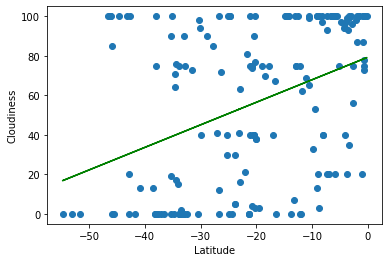

In [34]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Cloudiness']


#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


#save plot
plt.savefig(("../output_data/SouthernHemCloudinessvsLat.png"))

#show plot
plt.show()

Cloudiness and latitude are positively corelated in southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.13
y = 0.03 x + 5.95


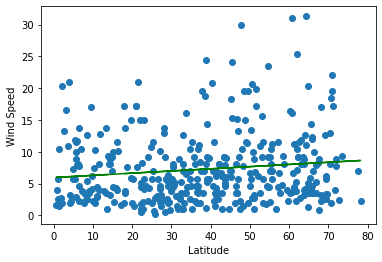

In [28]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Wind Speed']


#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


#save plot
plt.savefig(("../output_data/NorthernHemWindSpeedvsLat.png"))

#show plot
plt.show()

Latitude and wind speed have a low positive correlation in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.16
y = -0.06 x + 5.59


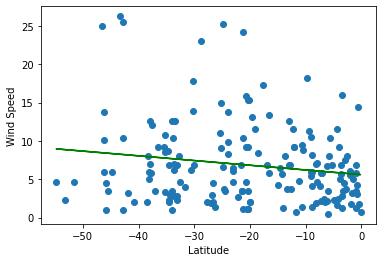

In [29]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Wind Speed']


#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

#add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


#save plot
plt.savefig(("../output_data/SouthernHemWindSpeedvsLat.png"))

#show plot
plt.show()

Latitude and windspeed are have a low negative correlation in the southern hemisphere. 